# Uniform flow to a well in a single layer

In this notebook, we will simulate steady flow to an extraction well in a single aquifer. The hydraulic conductivity is $k=10$ m/d. The aquifer bottom and top are at 0 m and 10 m. The transmissivity of the aquifer is approximated as constant. The porosity of the aquifer is 0.3. Far away from the pumping well, flow is uniform from East to West with a gradient of 0.001. The head at $(x, y)=(-1000, 0)$ m is fixed at 41 m. The extraction well is located at $(x,y)=(-400,0)$ m, the discharge of the well is $Q=50$ m$^3$/d and the radius of the well is $r_w=0.2$ m. Note that you don't have to specify units in `timml`, but you are required to be consistent. Here, we use meters for length and days for time.

We start our timml model by importing the `timml` package and calling it `tml` and by importing the `numpy` package, which we will probably use somewhere in this notebook.

In [1]:
import numpy as np  # import numpy package
import timml as tml  # import timml package

The first step in a `timml` model is to create a model and define the aquifer properties. Here we use the `ModelMaq` class and specify the hydraulic conductivity and the top and bottom of the aquifer. The `ModelMaq` class returns a model object, which is stored in the variable `ml` (you can choose your own name if you don't like `ml`). 

In [2]:
ml = tml.ModelMaq(
    kaq=10,  # hydraulic conductivity, m/d
    z=[10, 0],  # top and bottom of aquifer, m
    npor=0.3,  # porosity, - (only used in pathline tracing)
)

Once the model is created, we can add analytic elements to the model. We start out by specifying the uniform flow (withe the `Uflow` class) and the point where the head is fixed (with the `Constant` class). We will add the extraction well later. Both the uniform flow and the constant are referred to as (analytic) elements. 

In [3]:
uf = tml.Uflow(
    model=ml,  # model to which element is added
    slope=0.001,  # head drop / distance in direction of flow
    angle=0,  # direction of uniform flow, straight East is zero degrees
)

In [4]:
rf = tml.Constant(
    model=ml,  # model to which element is added
    xr=-1000,  # x-location of fixed head, m
    yr=0,  # y-location of fixed head, m
    hr=41,  # fixed head, m
)

Next, the model is solved, which means that any unknown parameters in the model are computed. In this case, only the value of the constant is unknown. There are 2 elements (uniform flow and a constant) and there is one equation (to compute the constant so that the head at the reference point is equal to the supplied value). When the solution is successful, the message `solution complete` appears on the screen. 

In [5]:
ml.solve()

Number of elements, Number of equations: 2 , 1
..
solution complete


Now that the model is solved, the head can be computed at any point in the aquifer with the `head` function of the model. For example, the head at $(x,y)=(41,0)$, should be 41, since we specified that. The head drops 1 m every 1000 m (the slope is 0.001), which means that the head at $(x,y)=(0,0)$ should be 40. The `head` function returns an array with the head in every aquifer at the supplied location. In this case, we only have 1 aquifer, so it is an array of length 1. 

In [6]:
print(f"head at (x,y)=(-1000,0) is {ml.head(-1000, 0)[0]} m")
print(f"head at (x,y)=(0,0) is {ml.head(0, 0)[0]} m")

head at (x,y)=(-1000,0) is 41.0 m
head at (x,y)=(0,0) is 40.0 m


A contour plot of the head can be created with the `contour` function. The `contour` function requires the specification of the window, the part of the model that is to be contoured, by specifying `[xmin, xmax, ymin, ymax]`. Here we will make a contour plot for a window extending from $x=-1200$ till $x=200$ m and from $y=-500$ till $y=500$ m. Inside the window, the head is computed on a regular grid, which is then passed to the contouring routine (from `matplotlib`). Several keyword arguments are specified below. 

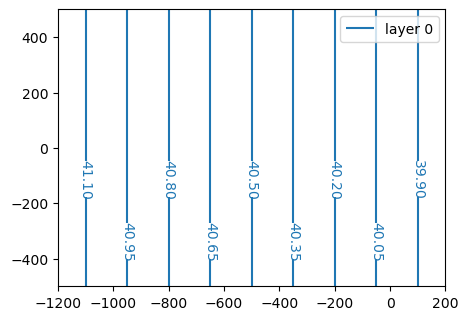

In [7]:
ml.contour(
    win=[-1200, 200, -500, 500],  # window to contour [xmin, xmax, ymin, ymax]
    ngr=50,  # number of points where to compute the head
    levels=10,  # number of contour intervals
    labels=True,  # add labels along the contours
    decimals=2,  # print labels with 2 decimal places
    legend=True,  # add a legend
    figsize=(5, 5),  # specify a figure size of 5 by 5 inches
)

The default contour levels are not what we want for this example, so let's specify the levels 
to go from 39 to 42 with steps of 0.1 (not all those levels are present in the current window, but the contouring routine will simply skip the ones that are not present). The number of decimals is now set to just 1.

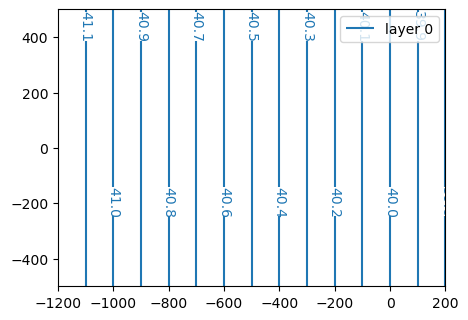

In [8]:
ml.contour(
    win=[-1200, 200, -500, 500],  # window to contour [xmin, xmax, ymin, ymax]
    ngr=50,  # number of points where to compute the head
    levels=np.arange(39, 42, 0.1),  # levels to be contoured
    labels=True,  # add labels along the contours
    decimals=1,  # print labels with 1 decimal place
    legend=True,  # add a legend
    figsize=(5, 5),  # specify a figure size of 5 by 5 inches
)

We are now ready to add the extraction well to the model.

In [9]:
w = tml.Well(
    model=ml,  # model to which element is added
    xw=-400,  # x-location of well, m
    yw=0,  # y-location of well, m
    Qw=100.0,  # discharge of well, positive for extraction, m^3/d
    rw=0.2,  # well radius, m
)

After the well is added, the model needs to be solved again. There are now 3 elements, but still only one unknown. 
The head at the well may be computed by evaluating the head in the model at the location of the well. Alternatively, the head inside the well may be computed by using the `headinside` function of the well. For this case, both values are the same, because the well doesn't have any entry resistance. 

In [10]:
ml.solve(silent=True)
print(f"head at the well: {ml.head(-400, 0)} m")
print(f"head inside the well: {w.headinside()} m")

head at the well: [39.12574703] m
head inside the well: [39.12554703] m


Head contours are created in the same fashion as before.

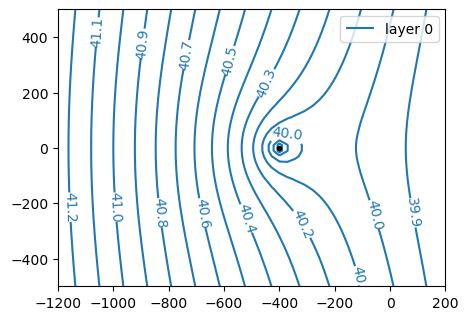

In [11]:
ml.contour(
    win=[-1200, 200, -500, 500],  # window to contour [xmin, xmax, ymin, ymax]
    ngr=50,  # number of points where to compute the head
    levels=np.arange(39, 42, 0.1),  # levels to be contoured
    labels=True,  # add labels along the contours
    decimals=1,  # print labels with 1 decimal place
    legend=True,  # add a legend
    figsize=(5, 5),  # specify a figure size of 5 by 5 inches
)

Pathlines may be started from any location with the `tracelines` function. Pathlines may only be visualized after the creation of a figure with, for example, the `contour` function. The `tracline` function requires the starting points of the pathlines ($x$, $y$, and $z$) and a maximum horizontal step size (in meters). `timml` will reduce the step size if necessary. Seven pathlines are generated below.

...........


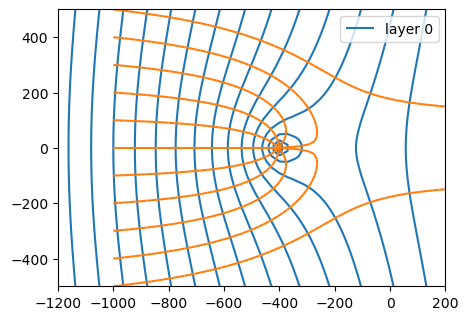

In [12]:
ml.contour(
    win=[-1200, 200, -500, 500],
    ngr=50,
    levels=np.arange(39, 42, 0.1),
    labels=False,
    figsize=(5, 5),
)
ml.tracelines(
    xstart=-1000 * np.ones(11),  # x-locations of starting points, m
    ystart=np.arange(-500, 501, 100),  # y-locations of starting points, m
    zstart=np.zeros(11),  # z-locations of starting points, m
    hstepmax=20,  # maximum horizontal step size, m
    color="C1",  # color of lines
)

Alternatively, a capture zone may be computed with the `plotcapzone` function by starting pathlines at the well radius and tracing the pathlines against the flow. The number of pathlines must be specified and the maximum time, which is specified as 20 years here, but since the time units are days, we specify the number of days. 

....................


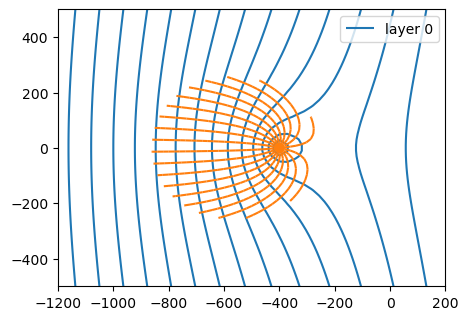

In [13]:
ml.contour(
    win=[-1200, 200, -500, 500],
    ngr=50,
    levels=np.arange(39, 42, 0.1),
    labels=False,
    figsize=(5, 5),
)
w.plotcapzone(
    nt=20,  # number of pathlines
    tmax=20 * 365.25,  # maximum time, d
    color="C1",
)